In [93]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,8]

In [95]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.models import load_model

# Construcción del Modelo

In [118]:
model = Sequential([
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
    Dropout(0.3),
    Dense(100, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, Y_train,batch_size=32, epochs=1000,validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/1000
537/537 [==============================] - 1s 1ms/step - loss: 2.9793 - accuracy: 0.6238 - val_loss: 2.7703 - val_accuracy: 0.5913
Epoch 2/1000
537/537 [==============================] - 0s 167us/step - loss: 2.5664 - accuracy: 0.6369 - val_loss: 2.3777 - val_accuracy: 0.6087
Epoch 3/1000
537/537 [==============================] - 0s 140us/step - loss: 2.2173 - accuracy: 0.6518 - val_loss: 2.0682 - val_accuracy: 0.6087
Epoch 4/1000
537/537 [==============================] - 0s 177us/step - loss: 1.9385 - accuracy: 0.6834 - val_loss: 1.8078 - val_accuracy: 0.6522
Epoch 5/1000
537/537 [==============================] - 0s 178us/step - loss: 1.6931 - accuracy: 0.6741 - val_loss: 1.6103 - val_accuracy: 0.6087
Epoch 6/1000
537/537 [==============================] - 0s 174us/step - loss: 1.5094 - accuracy: 0.7058 - val_loss: 1.4193 - val_accuracy: 0.6522
Epoch 7/1000
537/537 [==============================] - 0s 152us/step - loss: 1.

537/537 [==============================] - 0s 125us/step - loss: 0.6020 - accuracy: 0.7765 - val_loss: 0.6578 - val_accuracy: 0.6957
Epoch 57/1000
537/537 [==============================] - 0s 120us/step - loss: 0.5974 - accuracy: 0.7728 - val_loss: 0.6192 - val_accuracy: 0.7478
Epoch 58/1000
537/537 [==============================] - 0s 99us/step - loss: 0.5977 - accuracy: 0.7765 - val_loss: 0.6429 - val_accuracy: 0.7391
Epoch 59/1000
537/537 [==============================] - 0s 101us/step - loss: 0.5992 - accuracy: 0.7579 - val_loss: 0.6232 - val_accuracy: 0.7391
Epoch 60/1000
537/537 [==============================] - 0s 100us/step - loss: 0.6007 - accuracy: 0.7691 - val_loss: 0.6210 - val_accuracy: 0.7304
Epoch 61/1000
537/537 [==============================] - 0s 96us/step - loss: 0.6056 - accuracy: 0.7765 - val_loss: 0.6439 - val_accuracy: 0.7043
Epoch 62/1000
537/537 [==============================] - 0s 103us/step - loss: 0.5903 - accuracy: 0.7840 - val_loss: 0.6198 - val_accu

Epoch 112/1000
537/537 [==============================] - 0s 148us/step - loss: 0.5931 - accuracy: 0.7914 - val_loss: 0.6244 - val_accuracy: 0.7391
Epoch 113/1000
537/537 [==============================] - 0s 205us/step - loss: 0.5881 - accuracy: 0.7765 - val_loss: 0.6195 - val_accuracy: 0.7391
Epoch 114/1000
537/537 [==============================] - 0s 175us/step - loss: 0.5904 - accuracy: 0.7784 - val_loss: 0.6447 - val_accuracy: 0.7391
Epoch 115/1000
537/537 [==============================] - 0s 139us/step - loss: 0.6012 - accuracy: 0.7765 - val_loss: 0.6277 - val_accuracy: 0.7391
Epoch 116/1000
537/537 [==============================] - 0s 176us/step - loss: 0.5870 - accuracy: 0.7691 - val_loss: 0.6179 - val_accuracy: 0.7478
Epoch 117/1000
537/537 [==============================] - 0s 149us/step - loss: 0.6019 - accuracy: 0.7672 - val_loss: 0.6326 - val_accuracy: 0.7391
Epoch 118/1000
537/537 [==============================] - 0s 169us/step - loss: 0.5946 - accuracy: 0.7747 - val_

537/537 [==============================] - 0s 89us/step - loss: 0.5909 - accuracy: 0.7821 - val_loss: 0.6332 - val_accuracy: 0.7391
Epoch 168/1000
537/537 [==============================] - 0s 94us/step - loss: 0.5821 - accuracy: 0.7840 - val_loss: 0.6238 - val_accuracy: 0.7478
Epoch 169/1000
537/537 [==============================] - 0s 88us/step - loss: 0.5854 - accuracy: 0.7784 - val_loss: 0.6200 - val_accuracy: 0.7478
Epoch 170/1000
537/537 [==============================] - 0s 84us/step - loss: 0.5886 - accuracy: 0.7840 - val_loss: 0.6226 - val_accuracy: 0.7304
Epoch 171/1000
537/537 [==============================] - 0s 88us/step - loss: 0.5892 - accuracy: 0.7896 - val_loss: 0.6214 - val_accuracy: 0.7478
Epoch 172/1000
537/537 [==============================] - 0s 190us/step - loss: 0.5979 - accuracy: 0.7728 - val_loss: 0.6419 - val_accuracy: 0.7304
Epoch 173/1000
537/537 [==============================] - 0s 120us/step - loss: 0.5899 - accuracy: 0.7840 - val_loss: 0.6274 - val_a

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.168267). Check your callbacks.
  warnings.warn(


Epoch 184/1000
537/537 [==============================] - 0s 485us/step - loss: 0.5785 - accuracy: 0.7952 - val_loss: 0.6233 - val_accuracy: 0.7391
Epoch 185/1000
537/537 [==============================] - 0s 182us/step - loss: 0.5943 - accuracy: 0.7877 - val_loss: 0.6360 - val_accuracy: 0.7304
Epoch 186/1000
537/537 [==============================] - 0s 182us/step - loss: 0.5819 - accuracy: 0.7877 - val_loss: 0.6232 - val_accuracy: 0.7304
Epoch 187/1000
537/537 [==============================] - 0s 163us/step - loss: 0.5784 - accuracy: 0.7896 - val_loss: 0.6298 - val_accuracy: 0.7391
Epoch 188/1000
537/537 [==============================] - 0s 168us/step - loss: 0.5901 - accuracy: 0.7858 - val_loss: 0.6305 - val_accuracy: 0.7391
Epoch 189/1000
537/537 [==============================] - 0s 146us/step - loss: 0.5816 - accuracy: 0.7933 - val_loss: 0.6308 - val_accuracy: 0.7391
Epoch 190/1000
537/537 [==============================] - 0s 132us/step - loss: 0.5921 - accuracy: 0.7840 - val_

537/537 [==============================] - 0s 187us/step - loss: 0.5809 - accuracy: 0.7952 - val_loss: 0.6487 - val_accuracy: 0.7217
Epoch 240/1000
537/537 [==============================] - 0s 118us/step - loss: 0.5871 - accuracy: 0.7896 - val_loss: 0.6184 - val_accuracy: 0.7565
Epoch 241/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5809 - accuracy: 0.7933 - val_loss: 0.6300 - val_accuracy: 0.7391
Epoch 242/1000
537/537 [==============================] - 0s 110us/step - loss: 0.5965 - accuracy: 0.7840 - val_loss: 0.6233 - val_accuracy: 0.7478
Epoch 243/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5891 - accuracy: 0.7747 - val_loss: 0.6366 - val_accuracy: 0.7391
Epoch 244/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5895 - accuracy: 0.7840 - val_loss: 0.6327 - val_accuracy: 0.7391
Epoch 245/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5923 - accuracy: 0.7709 - val_loss: 0.6279 - val_

Epoch 295/1000
537/537 [==============================] - 0s 100us/step - loss: 0.6299 - accuracy: 0.7635 - val_loss: 0.6219 - val_accuracy: 0.7652
Epoch 296/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5933 - accuracy: 0.7821 - val_loss: 0.6406 - val_accuracy: 0.7217
Epoch 297/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5882 - accuracy: 0.7803 - val_loss: 0.6280 - val_accuracy: 0.7478
Epoch 298/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5859 - accuracy: 0.7877 - val_loss: 0.6310 - val_accuracy: 0.7391
Epoch 299/1000
537/537 [==============================] - 0s 103us/step - loss: 0.5829 - accuracy: 0.7858 - val_loss: 0.6287 - val_accuracy: 0.7391
Epoch 300/1000
537/537 [==============================] - 0s 104us/step - loss: 0.5955 - accuracy: 0.7896 - val_loss: 0.6357 - val_accuracy: 0.7391
Epoch 301/1000
537/537 [==============================] - 0s 94us/step - loss: 0.5901 - accuracy: 0.7784 - val_loss

537/537 [==============================] - 0s 100us/step - loss: 0.5863 - accuracy: 0.7914 - val_loss: 0.6232 - val_accuracy: 0.7478
Epoch 351/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5823 - accuracy: 0.7858 - val_loss: 0.6284 - val_accuracy: 0.7391
Epoch 352/1000
537/537 [==============================] - 0s 102us/step - loss: 0.5816 - accuracy: 0.7803 - val_loss: 0.6248 - val_accuracy: 0.7565
Epoch 353/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5869 - accuracy: 0.7877 - val_loss: 0.6205 - val_accuracy: 0.7478
Epoch 354/1000
537/537 [==============================] - 0s 94us/step - loss: 0.5941 - accuracy: 0.7728 - val_loss: 0.6604 - val_accuracy: 0.7130
Epoch 355/1000
537/537 [==============================] - 0s 94us/step - loss: 0.5994 - accuracy: 0.7784 - val_loss: 0.6263 - val_accuracy: 0.7391
Epoch 356/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5949 - accuracy: 0.7709 - val_loss: 0.6214 - val_a

Epoch 406/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5825 - accuracy: 0.7765 - val_loss: 0.6493 - val_accuracy: 0.7304
Epoch 407/1000
537/537 [==============================] - 0s 91us/step - loss: 0.5934 - accuracy: 0.7840 - val_loss: 0.6281 - val_accuracy: 0.7391
Epoch 408/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5798 - accuracy: 0.7803 - val_loss: 0.6478 - val_accuracy: 0.7391
Epoch 409/1000
537/537 [==============================] - 0s 98us/step - loss: 0.5802 - accuracy: 0.7914 - val_loss: 0.6213 - val_accuracy: 0.7739
Epoch 410/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5956 - accuracy: 0.7747 - val_loss: 0.6370 - val_accuracy: 0.7304
Epoch 411/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5944 - accuracy: 0.7877 - val_loss: 0.6484 - val_accuracy: 0.7217
Epoch 412/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5904 - accuracy: 0.7784 - val_loss: 0

537/537 [==============================] - 0s 137us/step - loss: 0.5865 - accuracy: 0.7877 - val_loss: 0.6314 - val_accuracy: 0.7391
Epoch 462/1000
537/537 [==============================] - 0s 146us/step - loss: 0.5895 - accuracy: 0.7896 - val_loss: 0.6282 - val_accuracy: 0.7391
Epoch 463/1000
537/537 [==============================] - 0s 145us/step - loss: 0.5895 - accuracy: 0.7747 - val_loss: 0.6284 - val_accuracy: 0.7391
Epoch 464/1000
537/537 [==============================] - 0s 106us/step - loss: 0.5907 - accuracy: 0.7896 - val_loss: 0.6355 - val_accuracy: 0.7478
Epoch 465/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5929 - accuracy: 0.7803 - val_loss: 0.6251 - val_accuracy: 0.7391
Epoch 466/1000
537/537 [==============================] - 0s 101us/step - loss: 0.5882 - accuracy: 0.7728 - val_loss: 0.6230 - val_accuracy: 0.7478
Epoch 467/1000
537/537 [==============================] - 0s 101us/step - loss: 0.5833 - accuracy: 0.7933 - val_loss: 0.6324 - v

Epoch 517/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5894 - accuracy: 0.7933 - val_loss: 0.6547 - val_accuracy: 0.7217
Epoch 518/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5968 - accuracy: 0.7896 - val_loss: 0.6235 - val_accuracy: 0.7565
Epoch 519/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5896 - accuracy: 0.7747 - val_loss: 0.6275 - val_accuracy: 0.7391
Epoch 520/1000
537/537 [==============================] - 0s 113us/step - loss: 0.5763 - accuracy: 0.7858 - val_loss: 0.6239 - val_accuracy: 0.7478
Epoch 521/1000
537/537 [==============================] - 0s 104us/step - loss: 0.5878 - accuracy: 0.7654 - val_loss: 0.6497 - val_accuracy: 0.7304
Epoch 522/1000
537/537 [==============================] - 0s 107us/step - loss: 0.5945 - accuracy: 0.7840 - val_loss: 0.6207 - val_accuracy: 0.7478
Epoch 523/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5886 - accuracy: 0.7709 - val_loss

537/537 [==============================] - 0s 99us/step - loss: 0.5929 - accuracy: 0.7933 - val_loss: 0.6385 - val_accuracy: 0.7391
Epoch 573/1000
537/537 [==============================] - 0s 101us/step - loss: 0.5891 - accuracy: 0.7803 - val_loss: 0.6239 - val_accuracy: 0.7478
Epoch 574/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5810 - accuracy: 0.7896 - val_loss: 0.6315 - val_accuracy: 0.7391
Epoch 575/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5777 - accuracy: 0.7914 - val_loss: 0.6236 - val_accuracy: 0.7391
Epoch 576/1000
537/537 [==============================] - 0s 103us/step - loss: 0.5749 - accuracy: 0.7952 - val_loss: 0.6515 - val_accuracy: 0.7217
Epoch 577/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5975 - accuracy: 0.7896 - val_loss: 0.6191 - val_accuracy: 0.7652
Epoch 578/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5834 - accuracy: 0.7896 - val_loss: 0.6427 - val_a

Epoch 628/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5889 - accuracy: 0.7933 - val_loss: 0.6419 - val_accuracy: 0.7217
Epoch 629/1000
537/537 [==============================] - 0s 106us/step - loss: 0.5834 - accuracy: 0.7914 - val_loss: 0.6364 - val_accuracy: 0.7391
Epoch 630/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5868 - accuracy: 0.7803 - val_loss: 0.6197 - val_accuracy: 0.7565
Epoch 631/1000
537/537 [==============================] - 0s 170us/step - loss: 0.5952 - accuracy: 0.7709 - val_loss: 0.6441 - val_accuracy: 0.7217
Epoch 632/1000
537/537 [==============================] - 0s 110us/step - loss: 0.5962 - accuracy: 0.7803 - val_loss: 0.6232 - val_accuracy: 0.7391
Epoch 633/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5977 - accuracy: 0.7840 - val_loss: 0.6352 - val_accuracy: 0.7391
Epoch 634/1000
537/537 [==============================] - 0s 106us/step - loss: 0.5897 - accuracy: 0.7858 - val_los

537/537 [==============================] - 0s 95us/step - loss: 0.5920 - accuracy: 0.7896 - val_loss: 0.6350 - val_accuracy: 0.7478
Epoch 684/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5904 - accuracy: 0.7858 - val_loss: 0.6311 - val_accuracy: 0.7391
Epoch 685/1000
537/537 [==============================] - 0s 98us/step - loss: 0.5794 - accuracy: 0.7784 - val_loss: 0.6271 - val_accuracy: 0.7391
Epoch 686/1000
537/537 [==============================] - 0s 89us/step - loss: 0.5778 - accuracy: 0.7914 - val_loss: 0.6308 - val_accuracy: 0.7391
Epoch 687/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5822 - accuracy: 0.7858 - val_loss: 0.6335 - val_accuracy: 0.7391
Epoch 688/1000
537/537 [==============================] - 0s 93us/step - loss: 0.5950 - accuracy: 0.7933 - val_loss: 0.6400 - val_accuracy: 0.7391
Epoch 689/1000
537/537 [==============================] - 0s 98us/step - loss: 0.5812 - accuracy: 0.7914 - val_loss: 0.6178 - val_acc

Epoch 739/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5885 - accuracy: 0.7858 - val_loss: 0.6358 - val_accuracy: 0.7391
Epoch 740/1000
537/537 [==============================] - 0s 106us/step - loss: 0.5879 - accuracy: 0.7784 - val_loss: 0.6311 - val_accuracy: 0.7391
Epoch 741/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5909 - accuracy: 0.7747 - val_loss: 0.6404 - val_accuracy: 0.7304
Epoch 742/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5793 - accuracy: 0.7840 - val_loss: 0.6276 - val_accuracy: 0.7478
Epoch 743/1000
537/537 [==============================] - 0s 104us/step - loss: 0.5922 - accuracy: 0.7728 - val_loss: 0.6347 - val_accuracy: 0.7391
Epoch 744/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5968 - accuracy: 0.7877 - val_loss: 0.6339 - val_accuracy: 0.7391
Epoch 745/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5907 - accuracy: 0.7858 - val_loss:

537/537 [==============================] - 0s 95us/step - loss: 0.5772 - accuracy: 0.7989 - val_loss: 0.6334 - val_accuracy: 0.7478
Epoch 795/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5909 - accuracy: 0.7896 - val_loss: 0.6367 - val_accuracy: 0.7391
Epoch 796/1000
537/537 [==============================] - 0s 94us/step - loss: 0.5944 - accuracy: 0.7747 - val_loss: 0.6281 - val_accuracy: 0.7391
Epoch 797/1000
537/537 [==============================] - 0s 103us/step - loss: 0.5901 - accuracy: 0.7821 - val_loss: 0.6388 - val_accuracy: 0.7391
Epoch 798/1000
537/537 [==============================] - 0s 110us/step - loss: 0.5818 - accuracy: 0.7803 - val_loss: 0.6400 - val_accuracy: 0.7391
Epoch 799/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5837 - accuracy: 0.7877 - val_loss: 0.6216 - val_accuracy: 0.7565
Epoch 800/1000
537/537 [==============================] - 0s 92us/step - loss: 0.5859 - accuracy: 0.7877 - val_loss: 0.6436 - val_a

537/537 [==============================] - 0s 104us/step - loss: 0.5956 - accuracy: 0.7691 - val_loss: 0.6286 - val_accuracy: 0.7391
Epoch 850/1000
537/537 [==============================] - 0s 109us/step - loss: 0.5875 - accuracy: 0.7635 - val_loss: 0.6283 - val_accuracy: 0.7565
Epoch 851/1000
537/537 [==============================] - 0s 91us/step - loss: 0.5816 - accuracy: 0.7840 - val_loss: 0.6359 - val_accuracy: 0.7391
Epoch 852/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5958 - accuracy: 0.7803 - val_loss: 0.6272 - val_accuracy: 0.7478
Epoch 853/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5841 - accuracy: 0.7728 - val_loss: 0.6457 - val_accuracy: 0.7217
Epoch 854/1000
537/537 [==============================] - 0s 102us/step - loss: 0.5930 - accuracy: 0.7803 - val_loss: 0.6298 - val_accuracy: 0.7391
Epoch 855/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5918 - accuracy: 0.7840 - val_loss: 0.6216 - val_

537/537 [==============================] - 0s 158us/step - loss: 0.5877 - accuracy: 0.7914 - val_loss: 0.6271 - val_accuracy: 0.7478
Epoch 905/1000
537/537 [==============================] - 0s 179us/step - loss: 0.5888 - accuracy: 0.7914 - val_loss: 0.6265 - val_accuracy: 0.7478
Epoch 906/1000
537/537 [==============================] - 0s 117us/step - loss: 0.5803 - accuracy: 0.7747 - val_loss: 0.6379 - val_accuracy: 0.7304
Epoch 907/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5909 - accuracy: 0.7840 - val_loss: 0.6402 - val_accuracy: 0.7391
Epoch 908/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5837 - accuracy: 0.7803 - val_loss: 0.6246 - val_accuracy: 0.7391
Epoch 909/1000
537/537 [==============================] - 0s 96us/step - loss: 0.5858 - accuracy: 0.7821 - val_loss: 0.6430 - val_accuracy: 0.7304
Epoch 910/1000
537/537 [==============================] - 0s 179us/step - loss: 0.5878 - accuracy: 0.7765 - val_loss: 0.6224 - val

537/537 [==============================] - 0s 103us/step - loss: 0.5879 - accuracy: 0.8007 - val_loss: 0.6294 - val_accuracy: 0.7391
Epoch 960/1000
537/537 [==============================] - 0s 120us/step - loss: 0.5931 - accuracy: 0.7803 - val_loss: 0.6279 - val_accuracy: 0.7391
Epoch 961/1000
537/537 [==============================] - 0s 183us/step - loss: 0.5921 - accuracy: 0.7784 - val_loss: 0.6317 - val_accuracy: 0.7391
Epoch 962/1000
537/537 [==============================] - 0s 185us/step - loss: 0.5947 - accuracy: 0.7952 - val_loss: 0.6265 - val_accuracy: 0.7478
Epoch 963/1000
537/537 [==============================] - 0s 181us/step - loss: 0.5746 - accuracy: 0.7840 - val_loss: 0.6269 - val_accuracy: 0.7478
Epoch 964/1000
537/537 [==============================] - 0s 106us/step - loss: 0.5894 - accuracy: 0.7877 - val_loss: 0.6517 - val_accuracy: 0.7217
Epoch 965/1000
537/537 [==============================] - 0s 126us/step - loss: 0.5912 - accuracy: 0.7635 - val_loss: 0.6287 - 

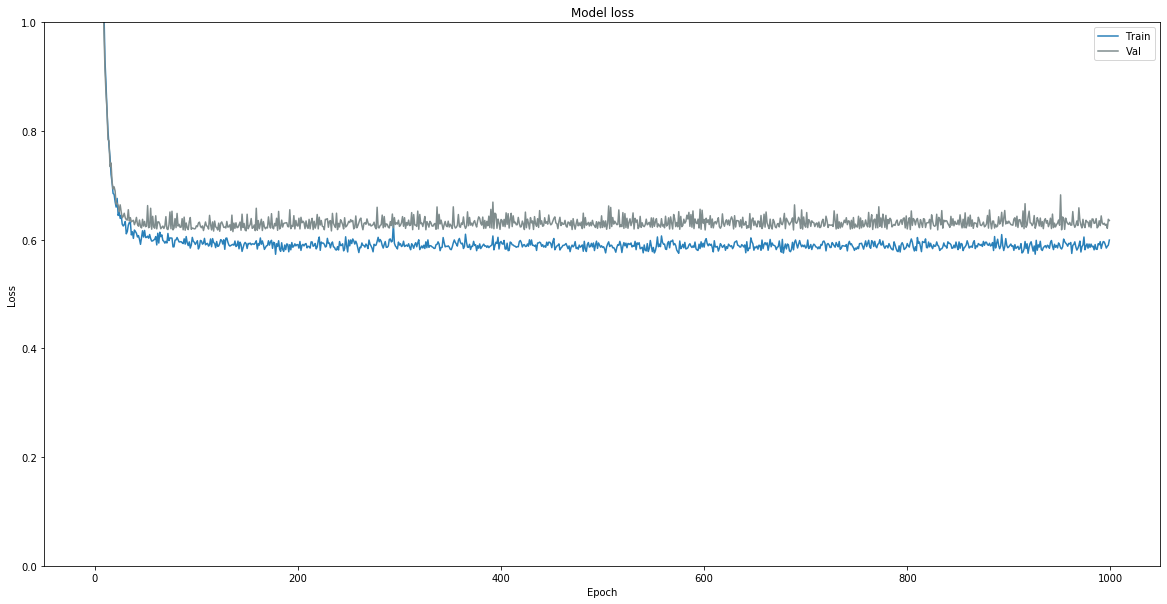

In [119]:
plt.figure(figsize=(20,10))
plt.plot(hist.history['loss'],color='#2980b9')
plt.plot(hist.history['val_loss'],color='#7f8c8d')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.0, bottom=0.0)
plt.show()

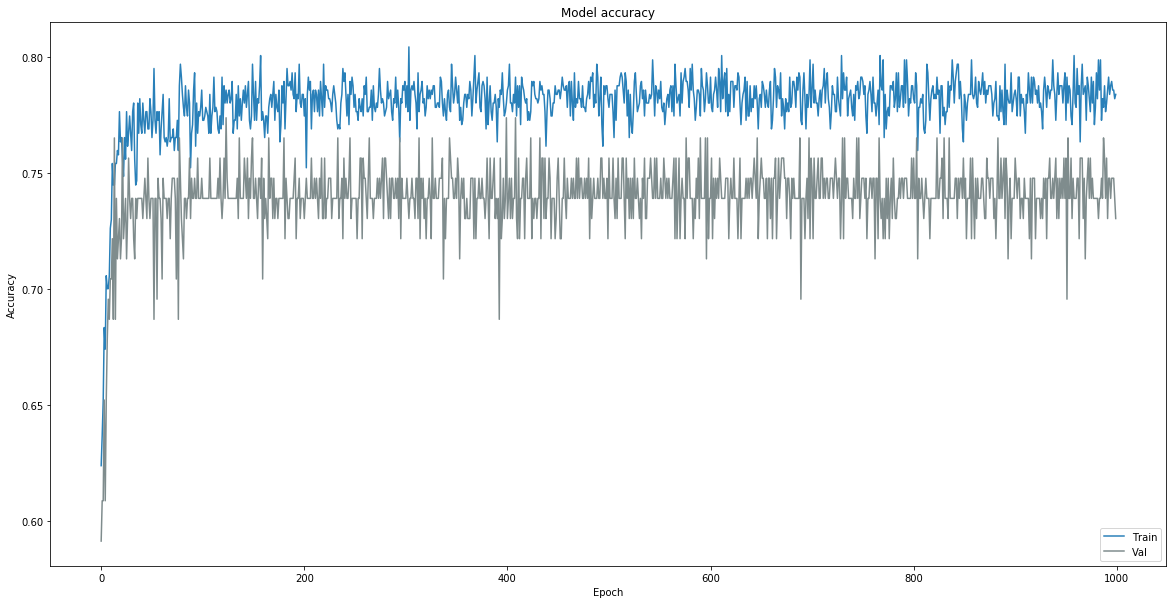

In [120]:
plt.figure(figsize=(20,10))
plt.plot(hist.history['accuracy'],color='#2980b9')
plt.plot(hist.history['val_accuracy'],color='#7f8c8d')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [121]:
model.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 156us/step


0.7758620977401733

In [122]:
pred = model.predict(X_test)
Y_pred = (pred > 0.5)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[77,  6],
       [20, 13]])

# Save a model

In [70]:
model.save("Rhea.h5")

# Load a model

In [90]:
model = load_model('Rhea.h5')

In [91]:
model.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 1ms/step


0.8275862336158752